In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('/content/FeatureEngineering - Sheet1.csv', parse_dates=['DepartureTime', 'ArrivalTime'], infer_datetime_format=True)

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert datetimes and calculate duration
data['DepartureTime'] = pd.to_datetime(data['DepartureTime'], format="%Y-%m-%d %H:%M:%S")
data['ArrivalTime'] = pd.to_datetime(data['ArrivalTime'], format="%Y-%m-%d %H:%M:%S")
data['TravelTime_seconds'] = (data['ArrivalTime'] - data['DepartureTime']).dt.total_seconds()

# Extract features
data['DepartureHour'] = data['DepartureTime'].dt.hour
X = data[['LATd', 'LONd', 'LATa', 'LONa', 'AVGSPDkmph', 'DistanceKm', 'DepartureHour', 'VesselType', 'Length', 'Width', 'Draft']]
y = data['TravelTime_seconds']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-1-08a872f9097e>:6: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv('/content/FeatureEngineering - Sheet1.csv', parse_dates=['DepartureTime', 'ArrivalTime'], infer_datetime_format=True)


In [ ]:
from lightgbm import LGBMRegressor

# Define and train the LightGBM model
lgb_model = LGBMRegressor(num_leaves=50, max_depth=12, learning_rate=0.1, n_estimators=200)
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_y_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 11
[LightGBM] [Info] Start training from score 252370.920000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
from xgboost import XGBRegressor

# Define and train the XGBoost model
xgb_model = XGBRegressor(max_depth=8, learning_rate=0.1, n_estimators=200)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Scale features for KNN model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_model.fit(X_train_scaled, y_train)

# Make predictions
knn_y_pred = knn_model.predict(X_test_scaled)

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the stacking ensemble model
estimators = [('lgb', lgb_model), ('xgb', xgb_model), ('knn', knn_model)]
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

# Train the stacking ensemble model
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_y_pred = stacking_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1515
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 11
[LightGBM] [Info] Start training from score 252370.920000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate LightGBM model
lgb_mae = mean_absolute_error(y_test, lgb_y_pred)
lgb_mse = mean_squared_error(y_test, lgb_y_pred)
lgb_r2 = r2_score(y_test, lgb_y_pred)
print("LightGBM Model:")
print("Mean Absolute Error:", lgb_mae)
print("Mean Squared Error:", lgb_mse)
print("R-squared:", lgb_r2)
print()

# Evaluate XGBoost model
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print("XGBoost Model:")
print("Mean Absolute Error:", xgb_mae)
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)
print()

# Evaluate KNN model
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
print("KNN Model:")
print("Mean Absolute Error:", knn_mae)
print("Mean Squared Error:", knn_mse)
print("R-squared:", knn_r2)
print()

# Evaluate stacking ensemble model
stacking_mae = mean_absolute_error(y_test, stacking_y_pred)
stacking_mse = mean_squared_error(y_test, stacking_y_pred)
stacking_r2 = r2_score(y_test, stacking_y_pred)
print("Stacking Ensemble Model:")
print("Mean Absolute Error:", stacking_mae)
print("Mean Squared Error:", stacking_mse)
print("R-squared:", stacking_r2)

LightGBM Model:
Mean Absolute Error: 15581.639180249924
Mean Squared Error: 1336400025.6061606
R-squared: 0.9933518548318447

XGBoost Model:
Mean Absolute Error: 3090.612171875
Mean Squared Error: 997873380.3972908
R-squared: 0.9950359121780845

KNN Model:
Mean Absolute Error: 47818.44758195625
Mean Squared Error: 13022878833.833643
R-squared: 0.9352155138164163

Stacking Ensemble Model:
Mean Absolute Error: 3534.327188740037
Mean Squared Error: 1023576076.0988019
R-squared: 0.9949080498247753


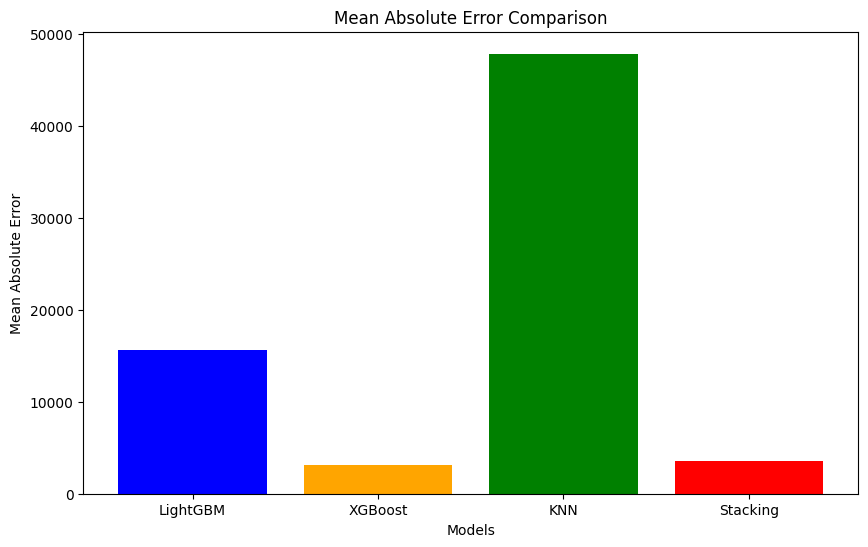

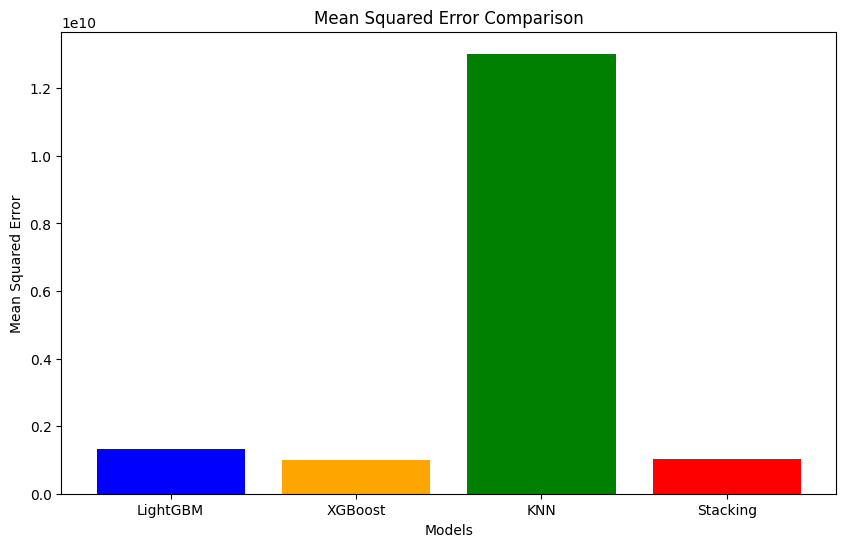

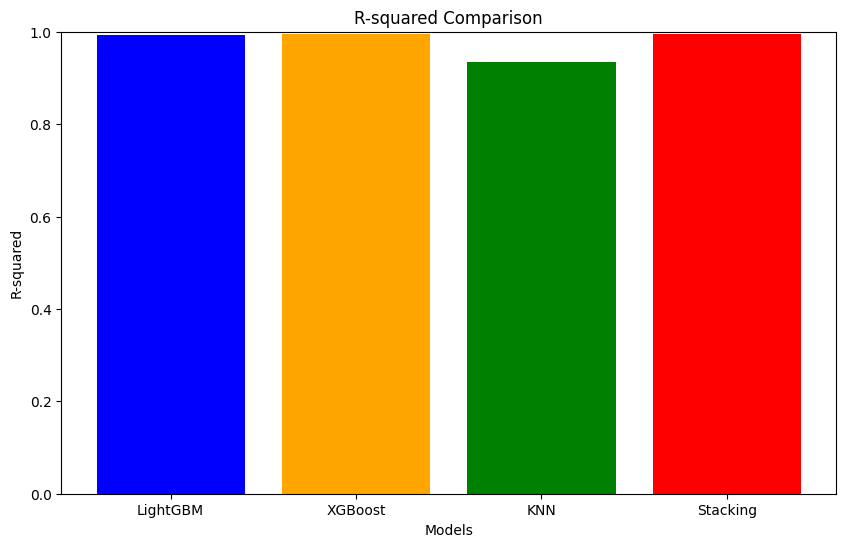

In [ ]:
import matplotlib.pyplot as plt

# Metrics for individual models
models = ['LightGBM', 'XGBoost', 'KNN', 'Stacking']
mae_scores = [lgb_mae, xgb_mae, knn_mae, stacking_mae]
mse_scores = [lgb_mse, xgb_mse, knn_mse, stacking_mse]
r2_scores = [lgb_r2, xgb_r2, knn_r2, stacking_r2]

# Plot MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error Comparison')
plt.show()

# Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error Comparison')
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared Comparison')
plt.ylim(0, 1)  # Setting y-axis limit to ensure the values are between 0 and 1
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate

# Define scoring metrics for cross-validation
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']

# Perform cross-validation for MAE, MSE, and R2
cv_results = cross_validate(stacking_model, X_train, y_train, cv=5, scoring=scoring)

# Extract cross-validation scores for each metric
cv_scores_mae = -cv_results['test_neg_mean_absolute_error'].mean()
cv_scores_mse = -cv_results['test_neg_mean_squared_error'].mean()
cv_scores_r2 = cv_results['test_r2'].mean()

print("Cross-Validation Mean Absolute Error (MAE) for Stacking Ensemble Model:", cv_scores_mae)
print("Cross-Validation Mean Squared Error (MSE) for Stacking Ensemble Model:", cv_scores_mse)
print("Cross-Validation R-squared (R2) for Stacking Ensemble Model:", cv_scores_r2)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

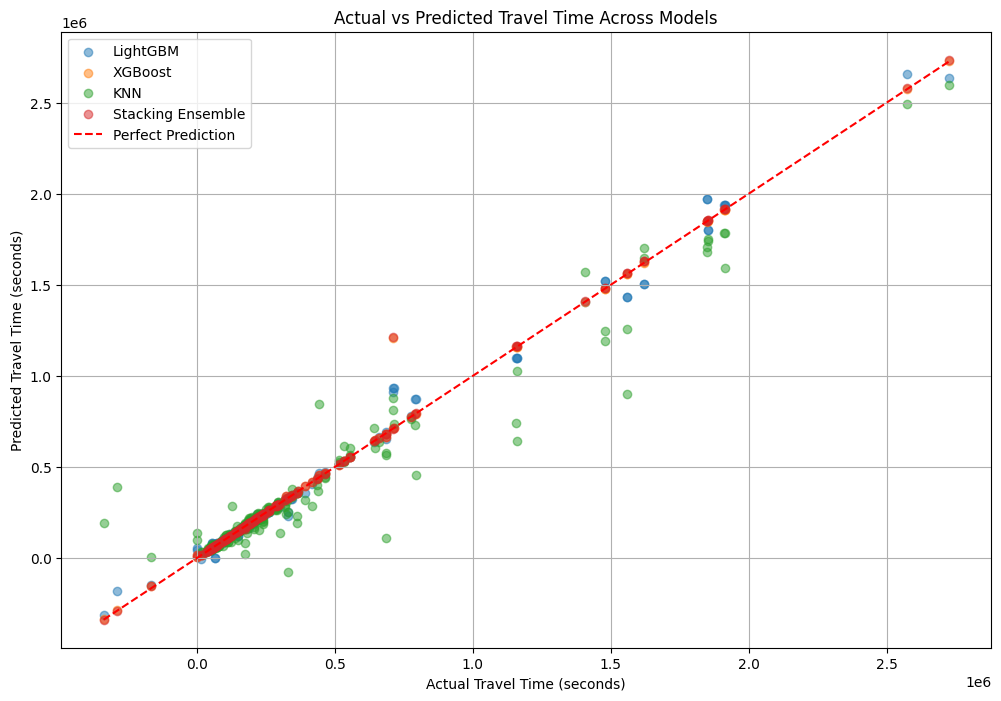

In [ ]:
# Create scatter plot comparing actual and predicted travel times for each model
plt.figure(figsize=(12, 8))

# LightGBM
plt.scatter(y_test, lgb_y_pred, label='LightGBM', alpha=0.5)

# XGBoost
plt.scatter(y_test, xgb_y_pred, label='XGBoost', alpha=0.5)

# KNN
plt.scatter(y_test, knn_y_pred, label='KNN', alpha=0.5)

# Stacking Ensemble
plt.scatter(y_test, stacking_y_pred, label='Stacking Ensemble', alpha=0.5)

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Travel Time Across Models')
plt.xlabel('Actual Travel Time (seconds)')
plt.ylabel('Predicted Travel Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()